In [204]:
# Encoding categorical Values


In [205]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
#Read Data
df = pd.read_csv("diabetes_prediction_dataset_cleaned.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,current,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check For Duplicates

In [207]:
df.duplicated().sum()

np.int64(4969)

There is 4969 Duplicates, so we will drop them, reset the index

In [208]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop_duplicates(keep='first')
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.duplicated().sum()

np.int64(0)

In [209]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95031 entries, 0 to 95030
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95031 non-null  object 
 1   age                  95031 non-null  float64
 2   hypertension         95031 non-null  int64  
 3   heart_disease        95031 non-null  int64  
 4   smoking_history      95031 non-null  object 
 5   bmi                  95031 non-null  float64
 6   HbA1c_level          95031 non-null  float64
 7   blood_glucose_level  95031 non-null  int64  
 8   diabetes             95031 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.5+ MB


In [210]:
df_cleaned.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,95031.000000,95031.000000,95031.000000,95031.000000,95031.000000,95031.000000,95031.000000
mean,41.815072,0.078395,0.041239,27.322028,5.534003,138.277394,0.089224
std,22.473273,0.268794,0.198844,6.806947,1.074244,40.963334,0.285068
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.330000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.950000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Show Values of classes which should have some certain values

In [211]:
#Check For Impossible Values
print(df_cleaned['diabetes'].value_counts())
print("=====================")
print(df_cleaned['gender'].value_counts())
print("=====================")
print(df_cleaned["heart_disease"].value_counts())
print("=====================")
print(df_cleaned["hypertension"].value_counts())
print("=====================")
print(df_cleaned["smoking_history"].value_counts())

diabetes
0    86552
1     8479
Name: count, dtype: int64
gender
Female    55506
Male      39507
Other        18
Name: count, dtype: int64
heart_disease
0    91112
1     3919
Name: count, dtype: int64
hypertension
0    87581
1     7450
Name: count, dtype: int64
smoking_history
never          51401
former         19960
current         9968
ever            7268
not current     6434
Name: count, dtype: int64


Drop Other from gender as it is 0.00018% of the data

In [212]:
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Other']
df_cleaned['gender'].value_counts()

gender
Female    55506
Male      39507
Name: count, dtype: int64

In [213]:
df_cleaned[df_cleaned['age'] != df_cleaned['age'].astype(int)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,never,14.43,6.5,160,0
218,Female,0.56,0,0,never,16.85,5.0,140,0
241,Male,0.88,0,0,never,17.49,6.0,140,0
268,Female,0.16,0,0,never,12.15,6.6,100,0
396,Male,0.16,0,0,never,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
94614,Female,0.40,0,0,never,16.66,3.5,140,0
94702,Female,0.64,0,0,never,17.58,6.1,140,0
94835,Female,0.32,0,0,never,12.26,5.8,126,0
94957,Female,0.32,0,0,never,18.37,3.5,80,0


As the age values that have floating numbers are between 0.08 and 1.48 which refers to childs we will keep them for now

Now let's see if there is any outliers

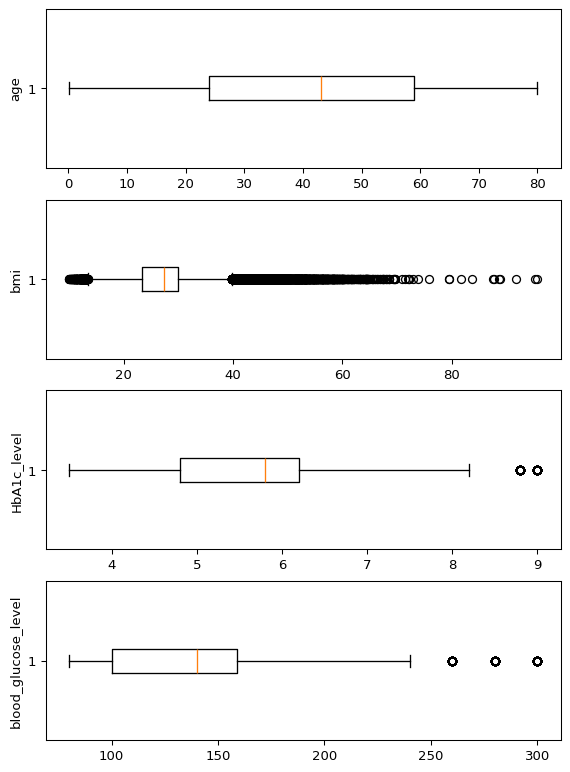

In [214]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
specefic_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_df = df_cleaned[specefic_cols]
for col in numeric_df.columns:
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

There is no Outliers in Age, and some outliers in HbA1c_level, blood_glucose_level, and BMI

We will count number of outliers and remove them

In [215]:
df_cleaned_recovery = df_cleaned.copy()
q1s = []
q3s = []
for col in ['HbA1c_level', 'blood_glucose_level', 'bmi']:
    q1, q3 = np.percentile(df_cleaned[col], [25, 75])
    q1s.append(q1)
    q3s.append(q3)

i=0
for col in ['HbA1c_level', 'blood_glucose_level', 'bmi']:
    iqr = q3s[i] - q1s[i]
    lower_bound = q1s[i] - (1.5 * iqr)
    upper_bound = q3s[i] + (1.5 * iqr)
    i+=1
    print(f'length of outliers in {col} before cleaning', len(df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]))
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    print(f'length of outliers in {col} after cleaning', len(df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]))

length of outliers in HbA1c_level before cleaning 1311
length of outliers in HbA1c_level after cleaning 0
length of outliers in blood_glucose_level before cleaning 1721
length of outliers in blood_glucose_level after cleaning 0
length of outliers in bmi before cleaning 4599
length of outliers in bmi after cleaning 0


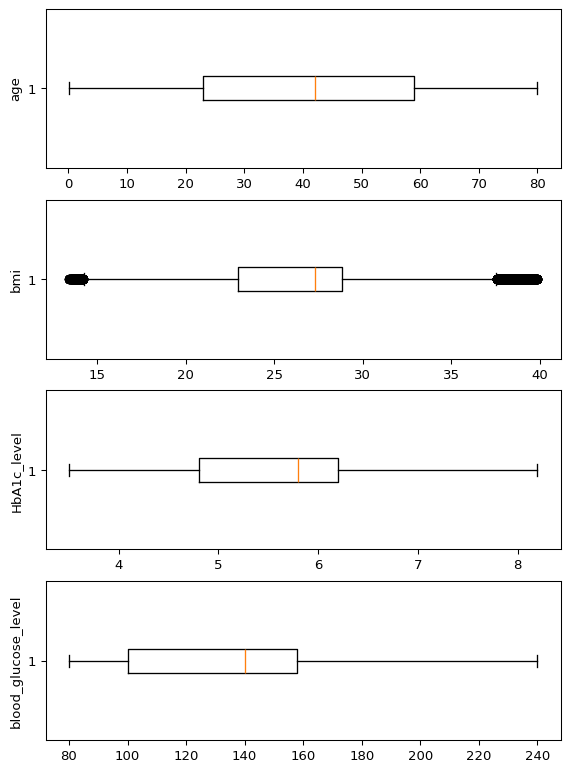

In [216]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
i = 0
specefic_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_df = df_cleaned[specefic_cols]
for col in numeric_df.columns:
    axs[i].boxplot(numeric_df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

As we can see new outliers results in BMI so we will recover the removed outliers from BMI for now

In [217]:
iqr = q3s[2] - q1s[2]
lower_bound = q1s[2] - (1.5 * iqr)
upper_bound = q3s[2] + (1.5 * iqr)

bmi_outliers = df_cleaned_recovery[(df_cleaned_recovery['bmi'] < lower_bound) | (df_cleaned_recovery['bmi'] > upper_bound)]
i=0
for col in ['HbA1c_level', 'blood_glucose_level']:
    iqr = q3s[i] - q1s[i]
    lower_bound = q1s[i] - (1.5 * iqr)
    upper_bound = q3s[i] + (1.5 * iqr)
    i+=1
    bmi_outliers = bmi_outliers[(bmi_outliers[col] >= lower_bound) & (bmi_outliers[col] <= upper_bound)]

bmi_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4599 entries, 11 to 95025
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               4599 non-null   object 
 1   age                  4599 non-null   float64
 2   hypertension         4599 non-null   int64  
 3   heart_disease        4599 non-null   int64  
 4   smoking_history      4599 non-null   object 
 5   bmi                  4599 non-null   float64
 6   HbA1c_level          4599 non-null   float64
 7   blood_glucose_level  4599 non-null   int64  
 8   diabetes             4599 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 359.3+ KB


In [218]:
df_cleaned_recovery = df_cleaned.copy()
df_cleaned = pd.concat([df_cleaned, bmi_outliers]).sort_index()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91981 entries, 0 to 95030
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               91981 non-null  object 
 1   age                  91981 non-null  float64
 2   hypertension         91981 non-null  int64  
 3   heart_disease        91981 non-null  int64  
 4   smoking_history      91981 non-null  object 
 5   bmi                  91981 non-null  float64
 6   HbA1c_level          91981 non-null  float64
 7   blood_glucose_level  91981 non-null  int64  
 8   diabetes             91981 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ MB


Now let's encode Categorical Remaining Data

In [219]:
df_cleaned['gender'] = df_cleaned['gender'].map({'Male': 0, 'Female': 1})


df_cleaned['smoking_history'] = df_cleaned['smoking_history'].map({
    'never': 0,
    'not current': 1,
    'former': 2,
    'ever': 3,
    'current': 4
})


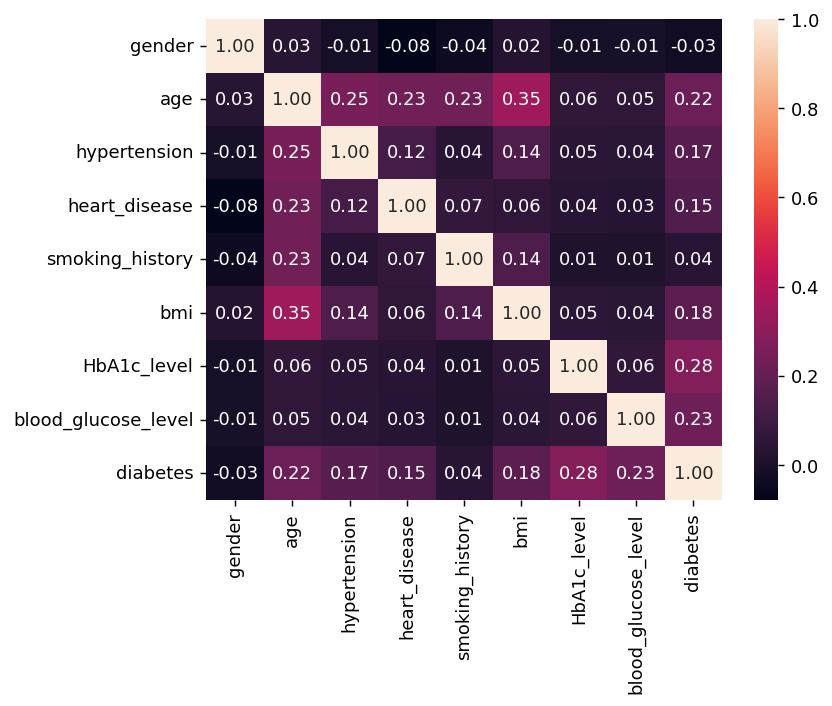

diabetes               1.000000
HbA1c_level            0.279965
blood_glucose_level    0.228621
age                    0.220704
bmi                    0.181200
hypertension           0.167091
heart_disease          0.145171
smoking_history        0.037091
gender                -0.030359
Name: diabetes, dtype: float64

In [227]:
#correlation
corr = df_cleaned.corr()

plt.figure(dpi=130)
sns.heatmap(df_cleaned.corr(), annot=True, fmt= '.2f')
plt.show()
corr['diabetes'].sort_values(ascending = False)


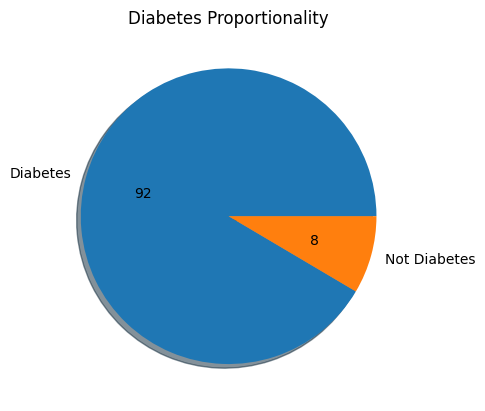

In [ ]:
plt.pie(df.diabetes.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Diabetes Proportionality')
plt.show()

We will check normality of the features

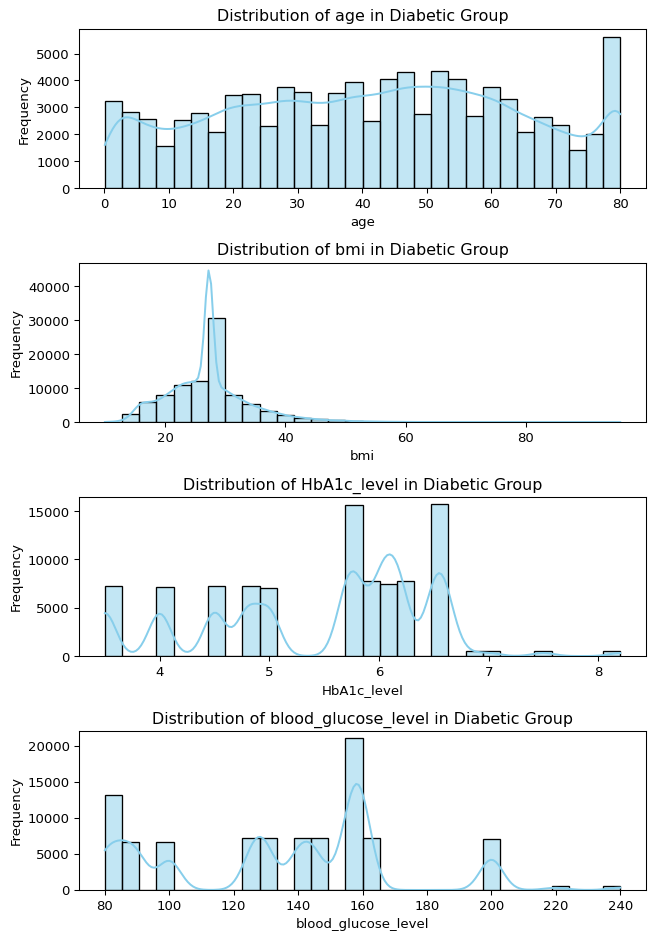

In [241]:
fig, axs = plt.subplots(4,1,dpi=95, figsize=(7,10))
for i, col in enumerate(specefic_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue', ax=axs[i])
    axs[i].set_title(f"Distribution of {col} in Diabetic Group")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


BMI is the only one that is normally distributed

Now let's do Feature importance Analysis using randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_cleaned.drop(columns='diabetes')
y = df_cleaned['diabetes']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")


gender: 0.009
age: 0.130
hypertension: 0.013
heart_disease: 0.010
smoking_history: 0.032
bmi: 0.181
HbA1c_level: 0.394
blood_glucose_level: 0.231
